# Resnet 50
- Dataset: PolyU Contactless 2D to Contact-based 2D Fingerprint Images Database. http://www4.comp.polyu.edu.hk/~csajaykr/fingerprint.htm
- Keras: 2.8
- TensorFlow: 2.8
- Python: 3.9

Sandra Aguilar

# Importing Libraries

In [85]:
import keras
import numpy as np
import PIL
import tensorflow as tf
from tensorflow.python.keras.layers import Dense, Flatten
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# Data understanding /Data preparation
Dataset

In [86]:
import pathlib
data_dir = r'C:\Users\sandra\Documents\Biometrics\processed_contactless_2d_fingerprint_images\first_session'
data_dir = pathlib.Path(data_dir)

In [87]:
class_count = len(list(data_dir.glob('*/')))
print('Number of classes:' + str(class_count))

Number of classes:336


Showing one image of the dataset

C:\Users\sandra\Documents\Biometrics\processed_contactless_2d_fingerprint_images\first_session\p1\p1.bmp


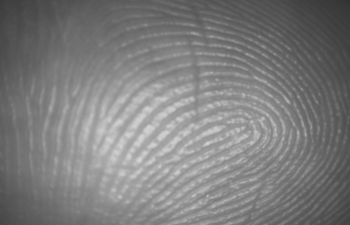

In [88]:
person1 = list(data_dir.glob('p1/*'))
print(person1[0])
PIL.Image.open(str(person1[0]))

## Splitting the dataset


### Training Dataset
80 % for training, 20% for validation

In [89]:
img_height,img_width=350,225
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.3,
  subset="training",
  seed=123,
  label_mode='categorical',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1680 files belonging to 336 classes.
Using 1176 files for training.


### Validation dataset

In [90]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.3,
  subset="validation",
  seed=123,
  label_mode='categorical',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1680 files belonging to 336 classes.
Using 504 files for validation.


In [91]:
class_names = train_ds.class_names
print('Number of classes found: ')
print(class_names)

Number of classes found: 
['p1', 'p10', 'p100', 'p101', 'p102', 'p103', 'p104', 'p105', 'p106', 'p107', 'p108', 'p109', 'p11', 'p110', 'p111', 'p112', 'p113', 'p114', 'p115', 'p116', 'p117', 'p118', 'p119', 'p12', 'p120', 'p121', 'p122', 'p123', 'p124', 'p125', 'p126', 'p127', 'p128', 'p129', 'p13', 'p130', 'p131', 'p132', 'p133', 'p134', 'p135', 'p136', 'p137', 'p138', 'p139', 'p14', 'p140', 'p141', 'p142', 'p143', 'p144', 'p145', 'p146', 'p147', 'p148', 'p149', 'p15', 'p150', 'p151', 'p152', 'p153', 'p154', 'p155', 'p156', 'p157', 'p158', 'p159', 'p16', 'p160', 'p161', 'p162', 'p163', 'p164', 'p165', 'p166', 'p167', 'p168', 'p169', 'p17', 'p170', 'p171', 'p172', 'p173', 'p174', 'p175', 'p176', 'p177', 'p178', 'p179', 'p18', 'p180', 'p181', 'p182', 'p183', 'p184', 'p185', 'p186', 'p187', 'p188', 'p189', 'p19', 'p190', 'p191', 'p192', 'p193', 'p194', 'p195', 'p196', 'p197', 'p198', 'p199', 'p2', 'p20', 'p200', 'p201', 'p202', 'p203', 'p204', 'p205', 'p206', 'p207', 'p208', 'p209', 'p21

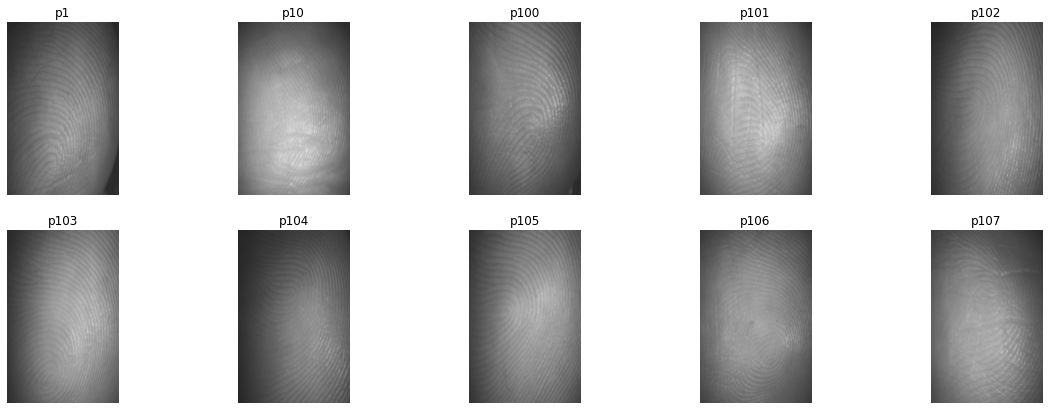

In [92]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 7))
for images, labels in train_ds.take(1):
  for i in range(10):
    ax = plt.subplot(2, 5, i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[i])
    plt.axis("off")

# Training The Model


In [93]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(img_height,img_width,3),
                   pooling='avg',
                   weights='imagenet')

for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten()) #this converts to 1D feature vectors
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(class_count, activation='softmax'))


In [94]:
resnet_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 module_wrapper_9 (ModuleWra  (None, 2048)             0         
 pper)                                                           
                                                                 
 module_wrapper_10 (ModuleWr  (None, 512)              1049088   
 apper)                                                          
                                                                 
 module_wrapper_11 (ModuleWr  (None, 336)              172368    
 apper)                                                          
                                                                 
Total params: 24,809,168
Trainable params: 1,221,456
Non-trainable params: 23,587,712
__________________________________

In [95]:
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [96]:
import time
epochs=15
start = time.time()
history = resnet_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,

)
end = time.time()
print(end - start)

Epoch 1/15
37/37 [==============================] - 108s 3s/step - loss: 5.8776 - accuracy: 0.0136 - val_loss: 5.7019 - val_accuracy: 0.0179
Epoch 2/15
37/37 [==============================] - 104s 3s/step - loss: 5.2661 - accuracy: 0.0757 - val_loss: 5.3621 - val_accuracy: 0.0298
Epoch 3/15
37/37 [==============================] - 102s 3s/step - loss: 4.3856 - accuracy: 0.2007 - val_loss: 4.6946 - val_accuracy: 0.1151
Epoch 4/15
37/37 [==============================] - 99s 3s/step - loss: 3.4095 - accuracy: 0.3852 - val_loss: 3.7547 - val_accuracy: 0.2282
Epoch 5/15
37/37 [==============================] - 98s 3s/step - loss: 2.5809 - accuracy: 0.5366 - val_loss: 3.1191 - val_accuracy: 0.3552
Epoch 6/15
37/37 [==============================] - 98s 3s/step - loss: 1.9353 - accuracy: 0.6590 - val_loss: 2.3825 - val_accuracy: 0.5476
Epoch 7/15
37/37 [==============================] - 106s 3s/step - loss: 1.4119 - accuracy: 0.7772 - val_loss: 1.9653 - val_accuracy: 0.6052
Epoch 8/15
37/37

# Evaluating The Model

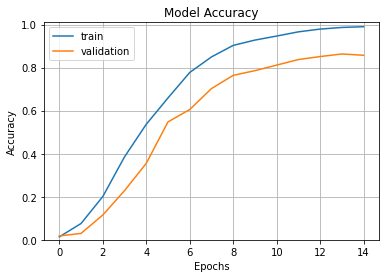

In [97]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0,ymax=1.01)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

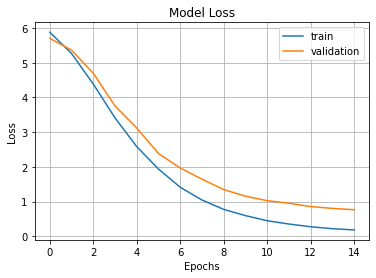

In [98]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

# Saving Model

In [113]:
tf.keras.models.save_model(
    resnet_model,
    "resnet50_contactless_final.model",
    overwrite=True,
    include_optimizer=True
)

INFO:tensorflow:Assets written to: resnet50_contactless_final.model\assets


INFO:tensorflow:Assets written to: resnet50_contactless_final.model\assets


# Making Predictions
I was taken one image from dataset second_session for testing

In [3]:
# model2 = tf.keras.models.load_model("resnet50_contactless_final.model")

(1, 350, 225, 3)
[[2.04394479e-09 3.19118271e-07 1.56376911e-10 4.77075046e-05
  1.63802861e-06 1.43274503e-09 1.23120486e-07 7.66018218e-08
  9.10660489e-08 1.12714060e-09 1.62233206e-07 6.81330192e-08
  4.20125446e-08 1.76640960e-08 2.81999805e-11 5.24919708e-09
  8.00743001e-05 3.59372194e-08 1.41690161e-05 5.33350204e-11
  3.03490274e-03 7.63439166e-05 1.50545702e-07 2.26169838e-09
  5.31825026e-05 2.66204783e-08 3.30943095e-07 1.10004713e-07
  1.97936839e-04 8.57597513e-07 1.66262853e-05 2.44684179e-05
  2.37141899e-06 1.51401964e-05 5.18455818e-06 7.35840558e-06
  9.07390870e-07 1.20865273e-09 9.12611082e-04 1.47482977e-04
  1.13222302e-06 5.34408230e-07 8.90072115e-05 3.21253744e-08
  7.04368285e-05 5.97560465e-05 8.46720241e-08 3.96286123e-05
  9.38835683e-07 1.16529136e-05 1.71598949e-04 1.60176228e-07
  9.33380591e-08 1.77991495e-07 2.80526319e-06 8.12636358e-09
  2.22459562e-06 2.09206971e-03 1.37207168e-03 1.15831397e-04
  2.30454003e-08 6.73606428e-06 8.14280909e-09 3.5936

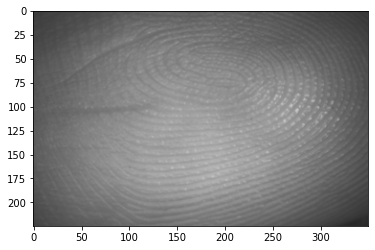

In [114]:
import cv2
path=r'C:\Users\sandra\Documents\Biometrics\processed_contactless_2d_fingerprint_images\test\p48\p6.bmp'
image=cv2.imread(path)
plt.imshow(image)
image_resized= cv2.resize(image, (img_width,img_height))
image=np.expand_dims(image_resized,axis=0)

print(image.shape)
pred=resnet_model.predict(image)
print(pred)

In [115]:
output_class=class_names[np.argmax(pred)]
print("The predicted class is", output_class)

The predicted class is p48


In [102]:
data_dir_test = r'C:\Users\sandra\Documents\Biometrics\processed_contactless_2d_fingerprint_images\test'
data_dir_test = pathlib.Path(data_dir_test)
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_test,
  seed=123,
  label_mode='categorical',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 336 files belonging to 336 classes.


In [103]:
test_loss, test_acc  = resnet_model.evaluate(test_ds,verbose=2)
print(test_acc)

11/11 - 22s - loss: 0.6019 - accuracy: 0.8899 - 22s/epoch - 2s/step
0.8898809552192688
